# 1. Check Original Dataset

In [1]:
import numpy as np
import pandas as pd

train_df = pd.read_csv('input/train.csv', index_col = 0)
test_df = pd.read_csv('input/test.csv', index_col = 0)

In [2]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 2. Merge dataset

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'log(price+1)'}>]], dtype=object)

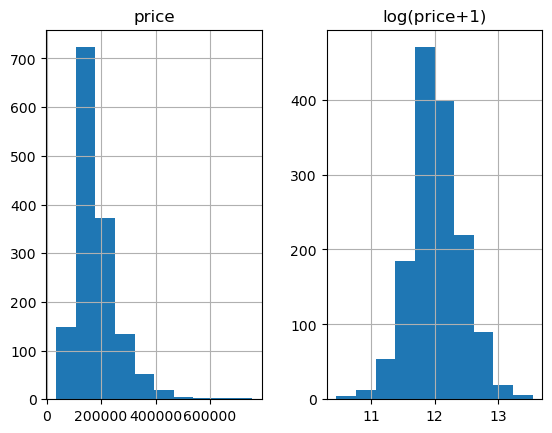

In [3]:
import matplotlib.pyplot as plt

prices = pd.DataFrame({
    "price" : train_df['SalePrice'],
    "log(price+1)" : np.log1p(train_df['SalePrice'])
})

prices.hist()

In [4]:
y_train = np.log1p(train_df.pop("SalePrice"))

all_df = pd.concat((train_df, test_df), axis=0)

In [5]:
all_df.shape

(2919, 79)

In [6]:
y_train.head()

Id
1    12.247699
2    12.109016
3    12.317171
4    11.849405
5    12.429220
Name: SalePrice, dtype: float64

# 3. Variable Transform

In [7]:
all_df["MSSubClass"].dtypes

dtype('int64')

In [8]:
# MSSubClass是类型数据，转化为str避免误导

all_df["MSSubClass"] = all_df['MSSubClass'].astype(str)
all_df["MSSubClass"].dtypes

dtype('O')

In [9]:
all_df["MSSubClass"].value_counts()

MSSubClass
20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: count, dtype: int64

### Category to Numerical

独热编码（One-Hot Encoding）是一种将分类变量转换为二进制向量的编码方式。在这种编码中，每个类别都用一个独特的二进制向量表示，该向量的长度等于类别的总数，其中只有一个位置为1，其余位置为0。

In [10]:
pd.get_dummies(all_df["MSSubClass"], prefix="MSSubClass").head()

,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
Id,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [11]:
all_dummy_df = pd.get_dummies(all_df)
all_dummy_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,False,False,False,True,False,False,False,False,True,False
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,False,False,False,True,False,False,False,False,True,False
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,False,False,False,True,False,False,False,False,True,False
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,False,False,False,True,True,False,False,False,False,False
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,False,False,False,True,False,False,False,False,True,False


### Clean Numerical

#### missing data

In [12]:
all_dummy_df.isnull().sum().sort_values(ascending=False).head(15)

LotFrontage         486
GarageYrBlt         159
MasVnrArea           23
BsmtFullBath          2
BsmtHalfBath          2
BsmtUnfSF             1
GarageArea            1
TotalBsmtSF           1
GarageCars            1
BsmtFinSF2            1
BsmtFinSF1            1
BsmtCond_TA           0
BsmtFinType1_BLQ      0
Foundation_Wood       0
BsmtFinType1_ALQ      0
dtype: int64

In [13]:
mean_cols = all_dummy_df.mean()
mean_cols.head(10)

LotFrontage        69.305795
LotArea         10168.114080
OverallQual         6.089072
OverallCond         5.564577
YearBuilt        1971.312778
YearRemodAdd     1984.264474
MasVnrArea        102.201312
BsmtFinSF1        441.423235
BsmtFinSF2         49.582248
BsmtUnfSF         560.772104
dtype: float64

In [14]:
all_dummy_df = all_dummy_df.fillna(mean_cols)

In [15]:
all_dummy_df.isnull().sum().sum()

0

### Standarize numerical data

标准化原本为numerical的数据，保留one-hot的category数据

计算标准分布 = （X-X')/s

让我们的数据点更平滑，更便于计算。

注意：我们这里也是可以继续使用Log的，我只是给大家展示一下多种“使数据平滑”的办法。

In [16]:
numeric_cols = all_df.columns[all_df.dtypes != 'object']
numeric_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [17]:
all_dummy_df[numeric_cols] = all_dummy_df[numeric_cols].astype(float)

numeric_col_means = all_dummy_df.loc[:,numeric_cols].mean()
numeric_col_std = all_dummy_df.loc[:,numeric_cols].std()
all_dummy_df.loc[:,numeric_cols] = (all_dummy_df.loc[:, numeric_cols] - numeric_col_means) / numeric_col_std

# 4. Build Model

数据集分回 训练/测试集

In [18]:
dummy_train_df = all_dummy_df.loc[train_df.index]
dummy_test_df = all_dummy_df.loc[test_df.index]

In [19]:
dummy_train_df.shape, dummy_test_df.shape

((1460, 302), (1459, 302))

## 高级的Ensemble
一般来说，单个分类器的效果真的是很有限。我们会倾向于把N多的分类器合在一起，做一个“综合分类器以达到最好的效果。

我们从刚刚的试验中得知，Ridge（alpha=15）给 了我们最好的结果


In [27]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 15)

### Bagging
Bagging把很多的小分类器放在一起，每个train随机的一部分数据，然后把它们的最终结果综合起来（多数投票制）。

Sklearn已经直接提供了这套构架，我们直接调用就行：

In [28]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score

In [32]:
X_train = dummy_train_df.values
X_test = dummy_test_df.values

params = [1, 10, 15, 20, 25, 30, 40]
test_scores = []

for param in params:
    clf = BaggingRegressor(n_estimators=param, estimator = ridge)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv = 10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

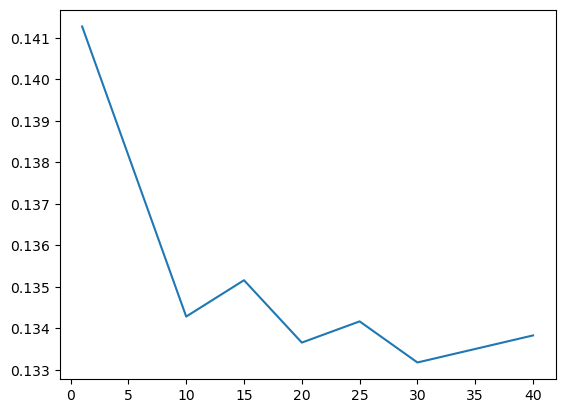

In [34]:
plt.plot(params, test_scores)

In [37]:
ridge.fit(X_train, y_train)
y_ridge = np.expm1(ridge.predict(X_test))


In [39]:
import numpy as np
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod.families import Gaussian
from sklearn.ensemble import BaggingRegressor
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.model_selection import cross_val_score

# Custom GLM wrapper with data type fixes and intercept handling
class GLMWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, family=Gaussian()):
        self.family = family
        self.glm_model = None

    def fit(self, X, y):
        # Convert to float and add intercept
        X = np.hstack([np.ones((X.shape[0], 1)), X]).astype(float)  # Add intercept + force float
        y = y.astype(float)  # Ensure y is float
        self.glm_model = GLM(y, X, family=self.family).fit()
        return self

    def predict(self, X):
        X = np.hstack([np.ones((X.shape[0], 1)), X]).astype(float)  # Add intercept + force float
        return self.glm_model.predict(X)

# Prepare data (force float conversion)
X_train = dummy_train_df.values.astype(float)
X_test = dummy_test_df.values.astype(float)

# Initialize GLM
glm = GLMWrapper(family=Gaussian())

# Hyperparameter tuning
params = [1, 10, 15, 20, 25, 30, 40]
test_scores = []

for param in params:
    clf = BaggingRegressor(
        n_estimators=param,
        estimator=glm,
        random_state=42
    )
    test_score = np.sqrt(-cross_val_score(
        clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error', error_score='raise'
    ))
    test_scores.append(np.mean(test_score))

# Final fit and prediction
glm.fit(X_train, y_train)
y_glm = np.expm1(glm.predict(X_test))

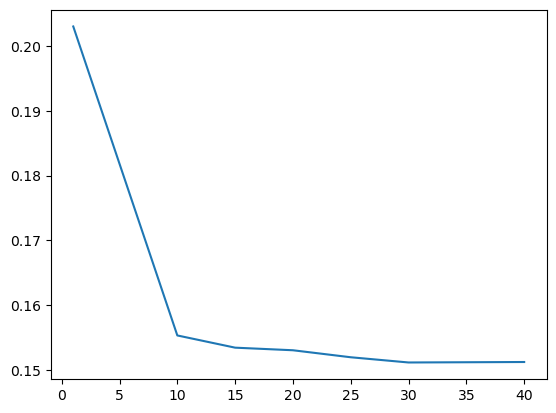

In [40]:
plt.plot(params, test_scores)